# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
import math
import random

# Importing datasets

In [ ]:
Diabetes = pd.read_csv('Diabetes.txt', header=None, sep="\t")
Diabetes = Diabetes.drop(9, axis=1)

Ionosphere = pd.read_csv('Ionosphere.txt', header=None)
Ionosphere.iloc[:,-1] = np.where(Ionosphere.iloc[:,-1] == 'g',1,-1)

Sonar = pd.read_csv('Sonar.txt', header=None)
Sonar.iloc[:,-1] = np.where(Sonar.iloc[:,-1] == 'R',1,-1)

print(Diabetes)
print(Ionosphere)
print(Sonar)

            0         1         2         3  ...         5         6         7  8
0   -1.141108 -1.998414 -0.470426 -1.287373  ... -1.305476  0.794147  2.870617 -1
1   -1.141108 -1.685647  0.356200 -1.287373  ...  1.687868 -0.838673  1.084937 -1
2   -1.141108 -1.497986 -3.570271 -1.287373  ... -1.381577 -0.391986 -0.700742 -1
3   -1.141108 -1.466709 -0.883738 -0.660501  ... -0.531772 -0.612311 -0.955839 -1
4   -1.141108 -1.341602  0.976169  0.530556  ...  0.622441 -0.114316 -1.040871 -1
..        ...       ...       ...       ...  ...       ...       ...       ... ..
763  2.716942  1.160539  2.319435 -1.287373  ...  1.307358 -0.648529  0.914873  1
764  3.013715 -0.653513  0.459528  0.279807  ...  0.584390 -0.180716  1.084937  1
765  3.013715  1.692244 -0.367098  0.593243  ...  0.203880 -0.784346  0.404679  1
766  3.310488  0.472450  0.046215  0.718617  ...  0.647808 -0.962417  0.829840  1
767  3.904034  1.316923  0.149543  1.282802  ...  1.129787  1.041636  1.169970  1

[768 rows x 9 c

# Splitting the datasets into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Diabetes.iloc[:, :-1], Diabetes.iloc[:, -1], test_size = 0.3, shuffle=True)

train_Diabetes = pd.concat([X_train, y_train], axis =1)
test_Diabetes = pd.concat([X_test, y_test], axis =1)

print(train_Diabetes, '\n')
print(test_Diabetes)

            0         1         2         3  ...         5         6         7  8
378 -0.250789 -0.309469 -0.573754  0.655930  ... -0.316150 -0.126389 -0.955839 -1
268 -0.547562 -0.966281  0.562856 -0.409752  ... -0.963017 -0.672675 -0.785774 -1
525  0.342757  0.065852  0.252871  1.220115  ...  0.267298 -0.612311 -0.445645 -1
86  -1.141108  0.628834 -3.570271 -1.287373  ...  1.320042 -0.805473 -0.360612  1
38  -1.141108 -0.497129  1.079497 -1.287373  ... -0.303466 -0.829618  1.084937 -1
..        ...       ...       ...       ...  ...       ...       ...       ... ..
202 -0.844335  0.097129 -0.470426  0.718617  ...  0.482920  0.127136 -1.040871 -1
124 -0.844335 -1.247772  0.149543 -0.159003  ... -0.683976 -0.570057 -0.785774 -1
438  0.045984 -0.684790 -0.057113  1.094741  ...  0.102411 -0.986562 -0.020483 -1
307 -0.547562 -0.278192  0.304536  0.718617  ...  0.470237 -0.977508 -1.040871 -1
140 -0.844335 -0.966281 -0.367098 -0.535127  ... -0.607874  0.326334 -0.785774 -1

[537 rows x 9 c

# Testing our weak learner (weak decision tree)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

weak_tree = DecisionTreeClassifier(criterion="entropy",max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(Diabetes.iloc[:, :-1], Diabetes.iloc[:, -1], test_size = 0.3, shuffle=True)
weak_tree.fit(X_train, y_train)
y_pred = weak_tree.predict(X_test)
Diabetes_before = accuracy_score(y_test, y_pred) * 100
print("%.2f%% For Diabetese" %Diabetes_before)

X_train, X_test, y_train, y_test = train_test_split(Ionosphere.iloc[:, :-1], Ionosphere.iloc[:, -1], test_size = 0.3, shuffle=True)
weak_tree.fit(X_train, y_train)
y_pred = weak_tree.predict(X_test)
Ionosphere_before = accuracy_score(y_test, y_pred) * 100
print("%.2f%% For Ionosphere" %Ionosphere_before)

X_train, X_test, y_train, y_test = train_test_split(Sonar.iloc[:, :-1], Sonar.iloc[:, -1], test_size = 0.3, shuffle=True)
weak_tree.fit(X_train, y_train)
y_pred = weak_tree.predict(X_test)
Sonar_before = accuracy_score(y_test, y_pred) * 100
print("%.2f%% For Sonar" %Sonar_before)

70.13% For Diabetese
83.02% For Ionosphere
65.08% For Sonar


# Boosting class

In [ ]:
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def myfit(self):

        X = self.dataset.iloc[:, :-1]
        Y = self.dataset.iloc[:, -1]

        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the weak tree model classifiers
            weak_tree = DecisionTreeClassifier(criterion="entropy",max_depth=1)
            
            model = weak_tree.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            models.append(model)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = model.predict(X)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation.iloc[:,0],1,0)

            # Calculate the misclassification rate
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])

            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])
  
            # Calculate the alpha values
            alpha = np.log((1-err)/err)/2
            alphas.append(alpha)

            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])
            Evaluation['weights'] = Evaluation['weights'] / np.sum(Evaluation['weights'])

        
        self.alphas = alphas
        self.models = models
            
    def mypredict(self):

        X_test = self.test_dataset.iloc[:, :-1]
        Y_test = self.test_dataset.iloc[:, -1]

        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test)
            predictions.append(prediction)
            self.accuracy.append(np.sum( np.sign(np.sum(np.array(predictions),axis=0)) == Y_test.values )/len(predictions[0]))
 
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))


# Functions

In [ ]:
def addNoise(dataset,n):
  
  X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size = 0.3, shuffle=True)
  cols = [i for i in range(len(dataset.columns)-1)]
  list_of_random_items = random.sample(cols, math.ceil((len(dataset.columns)-1) * n/100))
  noise = X_train.iloc[:, list_of_random_items] + np.random.normal( 0,1, X_train.iloc[:, list_of_random_items].shape )
  X_train.iloc[:,list_of_random_items] = noise

  return X_train, X_test,y_train,y_test

# Testing the code for Diabetes

Accuracy for Diabetese dataset with a weak learner was 70.13%
Accuracy for T =  21 : 76.28 % (Diabetes Dataset)
Accuracy for T =  31 : 74.81 % (Diabetes Dataset)
Accuracy for T =  41 : 76.28 % (Diabetes Dataset)
Accuracy for T =  51 : 76.06 % (Diabetes Dataset)


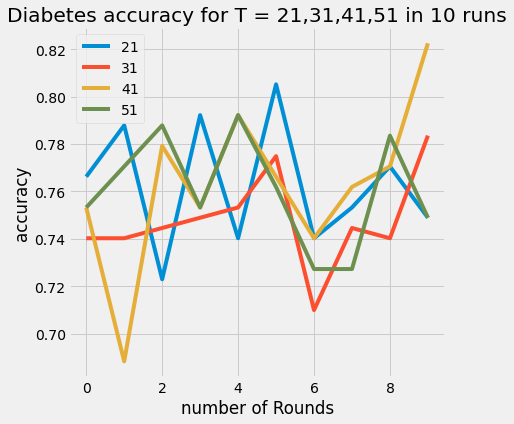

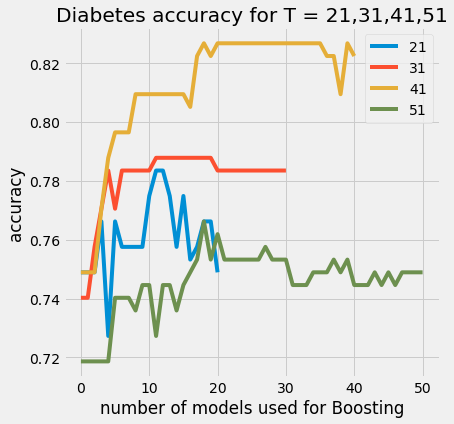

In [ ]:
print('Accuracy for Diabetese dataset with a weak learner was %.2f%%' %Diabetes_before)

AdaBoost_T = [21,31,41,51]

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)

fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)

for T in AdaBoost_T:
  accuracy = []
  for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(Diabetes.iloc[:, :-1], Diabetes.iloc[:, -1], test_size = 0.3, shuffle=True)
    train_Diabetes = pd.concat([X_train, y_train], axis =1)
    test_Diabetes = pd.concat([X_test, y_test], axis =1)

    model = Boosting(train_Diabetes,T,test_Diabetes)
    model.myfit()
    model.mypredict()
    accuracy.append(model.accuracy[-1])

  ax1.plot(range(len(model.accuracy)),model.accuracy,label=T)

  ax0.plot(range(len(accuracy)),accuracy,label=T)
  print('Accuracy for T = ' ,T ,': %.2f %% (Diabetes Dataset)' %(np.mean(accuracy)*100) )


ax0.legend()
ax0.set_xlabel('number of Rounds')
ax0.set_ylabel('accuracy')
ax0.set_title('Diabetes accuracy for T = 21,31,41,51 in 10 runs')    

ax1.legend()
ax1.set_xlabel('number of models used for Boosting')
ax1.set_ylabel('accuracy')
ax1.set_title('Diabetes accuracy for T = 21,31,41,51')   
plt.show()

# Testing the code for Ionosphere

Accuracy for Ionosphere dataset with a weak learner was 83.02%
Accuracy for T =  21 : 88.96 % (Ionosphere Dataset)
Accuracy for T =  31 : 90.85 % (Ionosphere Dataset)
Accuracy for T =  41 : 91.23 % (Ionosphere Dataset)
Accuracy for T =  51 : 91.98 % (Ionosphere Dataset)


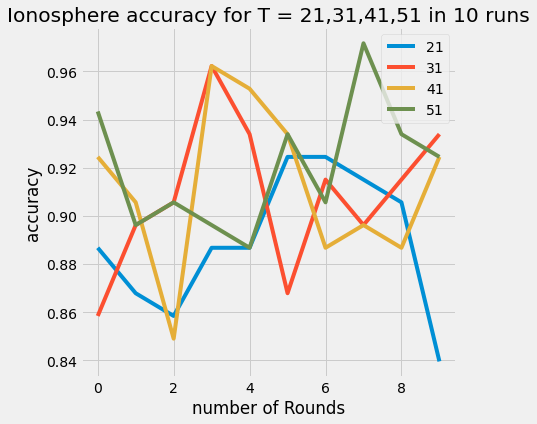

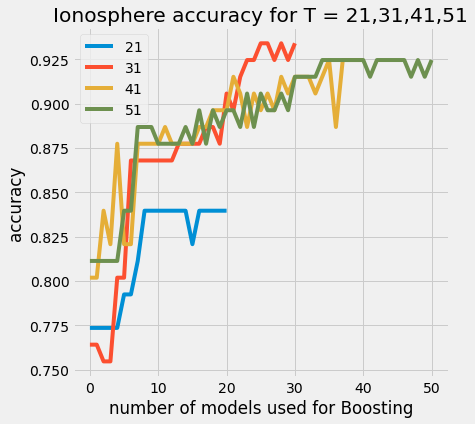

In [ ]:
print('Accuracy for Ionosphere dataset with a weak learner was %.2f%%' %Ionosphere_before)

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)

fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)

for T in AdaBoost_T:
  accuracy = []
  for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(Ionosphere.iloc[:, :-1], Ionosphere.iloc[:, -1], test_size = 0.3, shuffle=True)
    train_Ionosphere = pd.concat([X_train, y_train], axis =1)
    test_Ionosphere = pd.concat([X_test, y_test], axis =1)

    model = Boosting(train_Ionosphere,T,test_Ionosphere)
    
    model.myfit()
    model.mypredict()
    accuracy.append(model.accuracy[-1])

  ax1.plot(range(len(model.accuracy)),model.accuracy,label=T)

  ax0.plot(range(len(accuracy)),accuracy,label=T)
  print('Accuracy for T = ' ,T ,': %.2f %% (Ionosphere Dataset)' %(np.mean(accuracy)*100) )


ax0.legend()
ax0.set_xlabel('number of Rounds')
ax0.set_ylabel('accuracy')
ax0.set_title('Ionosphere accuracy for T = 21,31,41,51 in 10 runs')    

ax1.legend()
ax1.set_xlabel('number of models used for Boosting')
ax1.set_ylabel('accuracy')
ax1.set_title('Ionosphere accuracy for T = 21,31,41,51')   
plt.show()

# Testing the code for Sonar

Accuracy for Sonar dataset with a weak learner was 65.08%
Accuracy for T =  21 : 77.78 % (Sonar Dataset)
Accuracy for T =  31 : 77.94 % (Sonar Dataset)
Accuracy for T =  41 : 79.68 % (Sonar Dataset)
Accuracy for T =  51 : 80.00 % (Sonar Dataset)


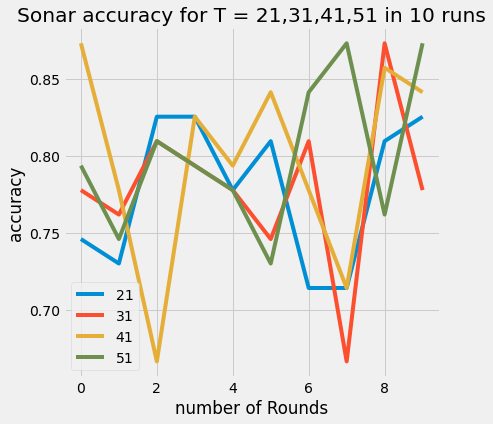

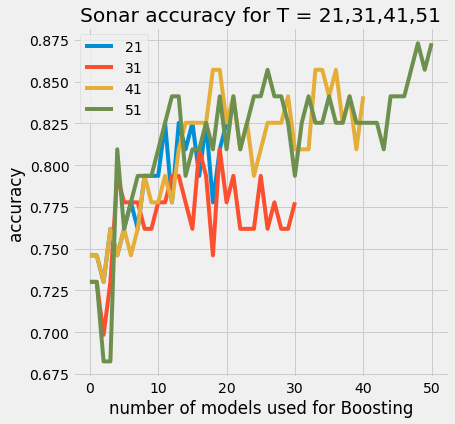

In [ ]:
print('Accuracy for Sonar dataset with a weak learner was %.2f%%' %Sonar_before)

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)

fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)

for T in AdaBoost_T:
  accuracy = []
  for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(Sonar.iloc[:, :-1], Sonar.iloc[:, -1], test_size = 0.3, shuffle=True)
    train_Sonar = pd.concat([X_train, y_train], axis =1)
    test_Sonar = pd.concat([X_test, y_test], axis =1)

    model = Boosting(train_Sonar,T,test_Sonar)
    
    model.myfit()
    model.mypredict()
    accuracy.append(model.accuracy[-1])

  ax1.plot(range(len(model.accuracy)),model.accuracy,label=T)

  ax0.plot(range(len(accuracy)),accuracy,label=T)
  print('Accuracy for T = ' ,T ,': %.2f %% (Sonar Dataset)' %(np.mean(accuracy)*100) )


ax0.legend()
ax0.set_xlabel('number of Rounds')
ax0.set_ylabel('accuracy')
ax0.set_title('Sonar accuracy for T = 21,31,41,51 in 10 runs')    
ax1.legend()
ax1.set_xlabel('number of models used for Boosting')
ax1.set_ylabel('accuracy')
ax1.set_title('Sonar accuracy for T = 21,31,41,51')   
plt.show()

# Testing noisy datas

In [ ]:
Noises = [10,20,30]
#Diabetes
for n in Noises:
  X_train, X_test, y_train, y_test = addNoise(Diabetes,n)
  weak_tree.fit(X_train, y_train)
  predict = weak_tree.predict(X_test)
  D_before_with_noise = accuracy_score(y_test, predict) * 100
  print('\n\t\t',n,'%% Noisy Diabetes (before : %.2f%%)' %D_before_with_noise)
  for T in AdaBoost_T:
    accuracy = []
    for i in range(10):
      X_train, X_test, y_train, y_test = addNoise(Diabetes,n)
      train_D_noisy = pd.concat([X_train, y_train], axis =1)
      test_D_noisy = pd.concat([X_test, y_test], axis =1)

      model = Boosting(train_D_noisy,T,test_D_noisy)
      model.myfit()
      model.mypredict()
      accuracy.append(model.accuracy[-1])

    print('\t\t\tAccuracy for T =' ,T ,': %.2f %%' %(np.mean(accuracy)*100) )

#Ionosphere
print('-'*70)
for n in Noises:
  X_train, X_test, y_train, y_test = addNoise(Ionosphere,n)
  weak_tree.fit(X_train, y_train)
  predict = weak_tree.predict(X_test)
  I_before_with_noise = accuracy_score(y_test, predict) * 100
  print('\n\t\t',n,'%% Noisy Ionosphere (before : %.2f%%)' %I_before_with_noise)
  for T in AdaBoost_T:
    accuracy = []
    for i in range(10):
      X_train, X_test, y_train, y_test = addNoise(Ionosphere,n)
      train_I_noisy = pd.concat([X_train, y_train], axis =1)
      test_I_noisy = pd.concat([X_test, y_test], axis =1)

      model = Boosting(train_I_noisy,T,test_I_noisy)
      model.myfit()
      model.mypredict()
      accuracy.append(model.accuracy[-1])

    print('\t\t\tAccuracy for T =' ,T ,': %.2f %%' %(np.mean(accuracy)*100) )

#Sonar
print('-'*70)
for n in Noises:
  X_train, X_test, y_train, y_test = addNoise(Sonar,n)
  weak_tree.fit(X_train, y_train)
  predict = weak_tree.predict(X_test)
  S_before_with_noise = accuracy_score(y_test, predict) * 100
  print('\n\t\t',n,'%% Noisy Sonar (before : %.2f%%)' %S_before_with_noise)
  for T in AdaBoost_T:
    accuracy = []
    for i in range(10):
      X_train, X_test, y_train, y_test = addNoise(Sonar,n)
      train_S_noisy = pd.concat([X_train, y_train], axis =1)
      test_S_noisy = pd.concat([X_test, y_test], axis =1)

      model = Boosting(train_S_noisy,T,test_S_noisy)
      model.myfit()
      model.mypredict()
      accuracy.append(model.accuracy[-1])

    print('\t\t\tAccuracy for T =' ,T ,': %.2f %%' %(np.mean(accuracy)*100) )


		 10 % Noisy Diabetes (before : 71.86%)
			Accuracy for T = 21 : 75.24 %
			Accuracy for T = 31 : 76.62 %
			Accuracy for T = 41 : 74.76 %
			Accuracy for T = 51 : 75.93 %

		 20 % Noisy Diabetes (before : 74.89%)
			Accuracy for T = 21 : 73.55 %
			Accuracy for T = 31 : 75.89 %
			Accuracy for T = 41 : 74.16 %
			Accuracy for T = 51 : 75.93 %

		 30 % Noisy Diabetes (before : 74.46%)
			Accuracy for T = 21 : 75.76 %
			Accuracy for T = 31 : 75.06 %
			Accuracy for T = 41 : 73.29 %
			Accuracy for T = 51 : 75.06 %
----------------------------------------------------------------------

		 10 % Noisy Ionosphere (before : 81.13%)
			Accuracy for T = 21 : 89.06 %
			Accuracy for T = 31 : 90.66 %
			Accuracy for T = 41 : 90.85 %
			Accuracy for T = 51 : 91.04 %

		 20 % Noisy Ionosphere (before : 83.96%)
			Accuracy for T = 21 : 86.98 %
			Accuracy for T = 31 : 88.77 %
			Accuracy for T = 41 : 89.81 %
			Accuracy for T = 51 : 90.57 %

		 30 % Noisy Ionosphere (before : 75.47%)
			Accuracy